In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm  
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.feature_selection import chi2,SelectKBest,f_classif, f_regression

In [3]:
lung_cancer=pd.read_csv("lungcancer2.csv")
lung_cancer.head()

C:\Users\babu saheb sah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Patient ID,Age recode with <1 year olds,Sex,Grade,Total number of in situ/malignant tumors for patient,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Primary Site - labeled,Primary Site,Type of Reporting Source,First malignant primary indicator,Sequence number,CS lymph nodes (2004-2015),Histology recode - broad groupings,RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Prim Site (1998+),CS tumor size (2004-2015),Survival months
0,273,75-79 years,Female,Well differentiated; Grade I,2,Blank(s),Blank(s),Blank(s),"C34.3-Lower lobe, lung",343,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,4 or more regional lymph nodes removed,30,31,128
1,390,60-64 years,Male,Poorly differentiated; Grade III,2,T4,N3,M0,C34.0-Main bronchus,340,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,Blank(s),8140-8389: adenomas and adenocarcinomas,Blank(s),0,Blank(s),1
2,455,75-79 years,Male,Poorly differentiated; Grade III,2,Blank(s),Blank(s),Blank(s),"C34.3-Lower lobe, lung",343,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,8050-8089: squamous cell neoplasms,4 or more regional lymph nodes removed,30,55,5
3,542,75-79 years,Female,Undifferentiated; anaplastic; Grade IV,2,TX,N3,M1,"C34.1-Upper lobe, lung",341,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,Blank(s),"8010-8049: epithelial neoplasms, NOS",Blank(s),0,Blank(s),1
4,565,70-74 years,Female,Unknown,2,Blank(s),Blank(s),Blank(s),"C34.1-Upper lobe, lung",341,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,"8010-8049: epithelial neoplasms, NOS",None,0,44,0


In [4]:
#Replacing all blanks in the data by NaN
lung_cancer = lung_cancer.replace({'Blank(s)':np.nan})
lung_cancer.head()

,Patient ID,Age recode with <1 year olds,Sex,Grade,Total number of in situ/malignant tumors for patient,T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),Primary Site - labeled,Primary Site,Type of Reporting Source,First malignant primary indicator,Sequence number,CS lymph nodes (2004-2015),Histology recode - broad groupings,RX Summ--Scope Reg LN Sur (2003+),RX Summ--Surg Prim Site (1998+),CS tumor size (2004-2015),Survival months
0,273,75-79 years,Female,Well differentiated; Grade I,2,NaN,NaN,NaN,"C34.3-Lower lobe, lung",343,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,4 or more regional lymph nodes removed,30,31,128
1,390,60-64 years,Male,Poorly differentiated; Grade III,2,T4,N3,M0,C34.0-Main bronchus,340,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,NaN,8140-8389: adenomas and adenocarcinomas,NaN,0,NaN,1
2,455,75-79 years,Male,Poorly differentiated; Grade III,2,NaN,NaN,NaN,"C34.3-Lower lobe, lung",343,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,8050-8089: squamous cell neoplasms,4 or more regional lymph nodes removed,30,55,5
3,542,75-79 years,Female,Undifferentiated; anaplastic; Grade IV,2,TX,N3,M1,"C34.1-Upper lobe, lung",341,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,NaN,"8010-8049: epithelial neoplasms, NOS",NaN,0,NaN,1
4,565,70-74 years,Female,Unknown,2,NaN,NaN,NaN,"C34.1-Upper lobe, lung",341,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,"8010-8049: epithelial neoplasms, NOS",None,0,44,0


In [5]:
#Renaming the columns to smaller strings
lung_cancer.rename(columns = {'T value - based on AJCC 3rd (1988-2003)':'T_value'}, inplace = True)
lung_cancer.rename(columns = {'N value - based on AJCC 3rd (1988-2003)':'N_value'}, inplace = True)
lung_cancer.rename(columns = {'M value - based on AJCC 3rd (1988-2003)':'M_value'}, inplace = True)
lung_cancer.rename(columns = { 'Survival months':'Survival_months'}, inplace = True)
lung_cancer.rename(columns = {'Age recode with <1 year olds':'Age'}, inplace = True)
lung_cancer.rename(columns = {'Total number of in situ/malignant tumors for patient':'NumMaligantTumor'}, inplace = True)
lung_cancer.rename(columns = {'Type of Reporting Source':'ReportingSource'}, inplace = True)
lung_cancer.rename(columns = {'First malignant primary indicator':'MaligantIndicator'}, inplace = True)
lung_cancer.rename(columns = {'CS lymph nodes (2004-2015)':'CSLymphNodes'}, inplace = True)
lung_cancer.rename(columns = {'Histology recode - broad groupings':'History'}, inplace = True)
lung_cancer.rename(columns = {'RX Summ--Surg Prim Site (1998+)':'RX Summ--Surg Prim Site'}, inplace = True)
lung_cancer.rename(columns = {'CS tumor size (2004-2015)':'CSTumorSize'}, inplace = True)
lung_cancer.rename(columns = {'Primary Site - labeled':'PrimarySite'}, inplace = True)

lung_cancer.rename(columns = {'RX Summ--Scope Reg LN Sur (2003+)':'RX_Summ_Scope_Reg_LN_Sur'}, inplace = True)

In [6]:
lung_cancer.columns

Index(['Patient ID', 'Age', 'Sex', 'Grade', 'NumMaligantTumor', 'T_value',
       'N_value', 'M_value', 'PrimarySite', 'Primary Site', 'ReportingSource',
       'MaligantIndicator', 'Sequence number', 'CSLymphNodes', 'History',
       'RX_Summ_Scope_Reg_LN_Sur', 'RX Summ--Surg Prim Site', 'CSTumorSize',
       'Survival_months'],
      dtype='object')

In [7]:
lung_cancer.head()

,Patient ID,Age,Sex,Grade,NumMaligantTumor,T_value,N_value,M_value,PrimarySite,Primary Site,ReportingSource,MaligantIndicator,Sequence number,CSLymphNodes,History,RX_Summ_Scope_Reg_LN_Sur,RX Summ--Surg Prim Site,CSTumorSize,Survival_months
0,273,75-79 years,Female,Well differentiated; Grade I,2,NaN,NaN,NaN,"C34.3-Lower lobe, lung",343,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,4 or more regional lymph nodes removed,30,31,128
1,390,60-64 years,Male,Poorly differentiated; Grade III,2,T4,N3,M0,C34.0-Main bronchus,340,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,NaN,8140-8389: adenomas and adenocarcinomas,NaN,0,NaN,1
2,455,75-79 years,Male,Poorly differentiated; Grade III,2,NaN,NaN,NaN,"C34.3-Lower lobe, lung",343,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,8050-8089: squamous cell neoplasms,4 or more regional lymph nodes removed,30,55,5
3,542,75-79 years,Female,Undifferentiated; anaplastic; Grade IV,2,TX,N3,M1,"C34.1-Upper lobe, lung",341,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,NaN,"8010-8049: epithelial neoplasms, NOS",NaN,0,NaN,1
4,565,70-74 years,Female,Unknown,2,NaN,NaN,NaN,"C34.1-Upper lobe, lung",341,Hospital inpatient/outpatient or clinic,No,2nd of 2 or more primaries,0,"8010-8049: epithelial neoplasms, NOS",None,0,44,0


In [8]:
lung_cancer.isna().sum()

Patient ID                       0
Age                              0
Sex                              0
Grade                            0
NumMaligantTumor                 0
T_value                     722421
N_value                     722421
M_value                     722421
PrimarySite                      0
Primary Site                     0
ReportingSource                  0
MaligantIndicator                0
Sequence number                  0
CSLymphNodes                302472
History                          0
RX_Summ_Scope_Reg_LN_Sur    147973
RX Summ--Surg Prim Site          0
CSTumorSize                 302472
Survival_months                  0
dtype: int64

In [9]:
for col in lung_cancer.columns:
    print('{} :unique {}'.format(col, lung_cancer[col].unique()))
    print('****************************************************')

Patient ID :unique [     273      390      455 ... 75826061 75826072 75826108]
****************************************************
Age :unique ['75-79 years' '60-64 years' '70-74 years' '65-69 years' '50-54 years'
 '55-59 years' '80-84 years' '85+ years' '45-49 years' '25-29 years'
 '35-39 years' '40-44 years' '30-34 years' '20-24 years' '15-19 years'
 '10-14 years' '05-09 years' '00 years' '01-04 years']
****************************************************
Sex :unique ['Female' 'Male']
****************************************************
Grade :unique ['Well differentiated; Grade I' 'Poorly differentiated; Grade III'
 'Undifferentiated; anaplastic; Grade IV' 'Unknown'
 'Moderately differentiated; Grade II']
****************************************************
NumMaligantTumor :unique [2 3 4 1 5 6 7 9 8 '1' '2' '3' '4' '6' '5' '7' '8' '9' 'Unknown' 11 14 10
 '11' 34 '10' 15 '20']
****************************************************
T_value :unique [nan 'T4' 'TX' 'T1' 'TXa' 'T2' 'TXc' 

In [10]:
#Dropping the columns that are not to be taken for features
lung_cancer = lung_cancer.drop(columns=['T_value','N_value','M_value', 'ReportingSource','Primary Site'])

In [11]:
lung_cancer.isna().sum()

Patient ID                       0
Age                              0
Sex                              0
Grade                            0
NumMaligantTumor                 0
PrimarySite                      0
MaligantIndicator                0
Sequence number                  0
CSLymphNodes                302472
History                          0
RX_Summ_Scope_Reg_LN_Sur    147973
RX Summ--Surg Prim Site          0
CSTumorSize                 302472
Survival_months                  0
dtype: int64

In [12]:
lung_cancer = lung_cancer[lung_cancer['CSTumorSize'].notna()]
lung_cancer = lung_cancer.reset_index()
lung_cancer.head()

,index,Patient ID,Age,Sex,Grade,NumMaligantTumor,PrimarySite,MaligantIndicator,Sequence number,CSLymphNodes,History,RX_Summ_Scope_Reg_LN_Sur,RX Summ--Surg Prim Site,CSTumorSize,Survival_months
0,0,273,75-79 years,Female,Well differentiated; Grade I,2,"C34.3-Lower lobe, lung",No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,4 or more regional lymph nodes removed,30,31,128
1,2,455,75-79 years,Male,Poorly differentiated; Grade III,2,"C34.3-Lower lobe, lung",No,2nd of 2 or more primaries,0,8050-8089: squamous cell neoplasms,4 or more regional lymph nodes removed,30,55,5
2,4,565,70-74 years,Female,Unknown,2,"C34.1-Upper lobe, lung",No,2nd of 2 or more primaries,0,"8010-8049: epithelial neoplasms, NOS",None,0,44,0
3,5,653,75-79 years,Female,Unknown,3,"C34.3-Lower lobe, lung",No,3rd of 3 or more primaries,200,"8010-8049: epithelial neoplasms, NOS",None,0,30,3
4,6,707,75-79 years,Female,Unknown,2,"C34.1-Upper lobe, lung",No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,None,0,14,95


In [13]:
lung_cancer = lung_cancer.drop(columns=['index','Patient ID'])
lung_cancer.head()

,Age,Sex,Grade,NumMaligantTumor,PrimarySite,MaligantIndicator,Sequence number,CSLymphNodes,History,RX_Summ_Scope_Reg_LN_Sur,RX Summ--Surg Prim Site,CSTumorSize,Survival_months
0,75-79 years,Female,Well differentiated; Grade I,2,"C34.3-Lower lobe, lung",No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,4 or more regional lymph nodes removed,30,31,128
1,75-79 years,Male,Poorly differentiated; Grade III,2,"C34.3-Lower lobe, lung",No,2nd of 2 or more primaries,0,8050-8089: squamous cell neoplasms,4 or more regional lymph nodes removed,30,55,5
2,70-74 years,Female,Unknown,2,"C34.1-Upper lobe, lung",No,2nd of 2 or more primaries,0,"8010-8049: epithelial neoplasms, NOS",None,0,44,0
3,75-79 years,Female,Unknown,3,"C34.3-Lower lobe, lung",No,3rd of 3 or more primaries,200,"8010-8049: epithelial neoplasms, NOS",None,0,30,3
4,75-79 years,Female,Unknown,2,"C34.1-Upper lobe, lung",No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,None,0,14,95


In [14]:
lung_cancer = lung_cancer.drop(lung_cancer[(lung_cancer.Survival_months =='Unknown')].index)

In [15]:
lung_cancer = lung_cancer.drop(lung_cancer[(lung_cancer.NumMaligantTumor =='Unknown')].index)

In [16]:
lung_cancer = lung_cancer.drop(lung_cancer[(lung_cancer.Grade =='Unknown')].index)

In [17]:
lung_cancer = lung_cancer.reset_index()
lung_cancer = lung_cancer.drop(columns=['index'])

In [18]:
for col in lung_cancer.columns:
    print('{} :unique {}'.format(col, lung_cancer[col].unique()))
    print('****************************************************')

Age :unique ['75-79 years' '50-54 years' '80-84 years' '60-64 years' '70-74 years'
 '55-59 years' '25-29 years' '85+ years' '65-69 years' '45-49 years'
 '40-44 years' '35-39 years' '10-14 years' '15-19 years' '20-24 years'
 '30-34 years' '05-09 years' '01-04 years' '00 years']
****************************************************
Sex :unique ['Female' 'Male']
****************************************************
Grade :unique ['Well differentiated; Grade I' 'Poorly differentiated; Grade III'
 'Undifferentiated; anaplastic; Grade IV'
 'Moderately differentiated; Grade II']
****************************************************
NumMaligantTumor :unique [2 4 3 5 6 7 9 8 1 '1' '2' '3' '4' '6' '5' '7' '8' '9' 11 '11' 10 15 '20'
 '10']
****************************************************
PrimarySite :unique ['C34.3-Lower lobe, lung' 'C34.0-Main bronchus' 'C34.1-Upper lobe, lung'
 'C34.2-Middle lobe, lung' 'C34.9-Lung, NOS'
 'C34.8-Overlapping lesion of lung']
************************************

In [19]:
lung_cancer.head()

,Age,Sex,Grade,NumMaligantTumor,PrimarySite,MaligantIndicator,Sequence number,CSLymphNodes,History,RX_Summ_Scope_Reg_LN_Sur,RX Summ--Surg Prim Site,CSTumorSize,Survival_months
0,75-79 years,Female,Well differentiated; Grade I,2,"C34.3-Lower lobe, lung",No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,4 or more regional lymph nodes removed,30,31,128
1,75-79 years,Male,Poorly differentiated; Grade III,2,"C34.3-Lower lobe, lung",No,2nd of 2 or more primaries,0,8050-8089: squamous cell neoplasms,4 or more regional lymph nodes removed,30,55,5
2,50-54 years,Female,Undifferentiated; anaplastic; Grade IV,2,C34.0-Main bronchus,No,2nd of 2 or more primaries,200,"8010-8049: epithelial neoplasms, NOS",None,0,16,23
3,80-84 years,Female,Poorly differentiated; Grade III,2,"C34.1-Upper lobe, lung",No,2nd of 2 or more primaries,0,8550-8559: acinar cell neoplasms,4 or more regional lymph nodes removed,33,28,29
4,80-84 years,Female,Poorly differentiated; Grade III,2,"C34.3-Lower lobe, lung",No,2nd of 2 or more primaries,0,8140-8389: adenomas and adenocarcinomas,None,0,30,8


In [20]:
lung_cancer.shape

(279434, 13)

In [21]:
lung_cancer2= lung_cancer.copy()

In [22]:
lung_cancer.dtypes

Age                         object
Sex                         object
Grade                       object
NumMaligantTumor            object
PrimarySite                 object
MaligantIndicator           object
Sequence number             object
CSLymphNodes                object
History                     object
RX_Summ_Scope_Reg_LN_Sur    object
RX Summ--Surg Prim Site      int64
CSTumorSize                 object
Survival_months             object
dtype: object

In [23]:
to_transform = ['Age', 'Sex','Grade', 'PrimarySite',
                'MaligantIndicator', 'Sequence number',  'History',
                'RX_Summ_Scope_Reg_LN_Sur']

In [24]:
for col in lung_cancer.columns:
    print(col)
    if col in to_transform:
        lung_cancer[col] = pd.Categorical(lung_cancer[col])
    else:
        lung_cancer[col] = pd.to_numeric(lung_cancer[col])

Age
Sex
Grade
NumMaligantTumor
PrimarySite
MaligantIndicator
Sequence number
CSLymphNodes
History
RX_Summ_Scope_Reg_LN_Sur
RX Summ--Surg Prim Site
CSTumorSize
Survival_months


In [26]:
lung_cancer.dtypes

Age                         category
Sex                         category
Grade                       category
NumMaligantTumor               int64
PrimarySite                 category
MaligantIndicator           category
Sequence number             category
CSLymphNodes                   int64
History                     category
RX_Summ_Scope_Reg_LN_Sur    category
RX Summ--Surg Prim Site        int64
CSTumorSize                    int64
Survival_months                int64
dtype: object

In [27]:
df = lung_cancer.copy()

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
for col in to_transform:
    df[col] = le.fit_transform(df[col])

In [30]:
series_orig_age = lung_cancer['NumMaligantTumor']
series_tumour_size = df['NumMaligantTumor']
list_series_orig_age = series_orig_age.tolist()
list_series_tumour_size = series_tumour_size.tolist()
print(len(list_series_orig_age))
print(len(list_series_tumour_size))
list_pair_orig_rename = []
for x in range(len(list_series_orig_age)):
    a = list_series_orig_age[x]
    list_pair_orig_rename.append((a, list_series_tumour_size[x]))

set_list_pair_orig_rename = set(list_pair_orig_rename)
print(set_list_pair_orig_rename)

279434
279434
{(3, 3), (5, 5), (6, 6), (11, 11), (10, 10), (4, 4), (20, 20), (7, 7), (9, 9), (8, 8), (2, 2), (1, 1), (15, 15)}


In [31]:
series_orig_age = lung_cancer['Age']
series_tumour_size = df['Age']
list_series_orig_age = series_orig_age.tolist()
list_series_tumour_size = series_tumour_size.tolist()
print(len(list_series_orig_age))
print(len(list_series_tumour_size))
list_pair_orig_rename = []
for x in range(len(list_series_orig_age)):
    a = list_series_orig_age[x]
    list_pair_orig_rename.append((a, list_series_tumour_size[x]))

set_list_pair_orig_rename = set(list_pair_orig_rename)
print(set_list_pair_orig_rename)

279434
279434
{('35-39 years', 8), ('55-59 years', 12), ('20-24 years', 5), ('75-79 years', 16), ('80-84 years', 17), ('40-44 years', 9), ('45-49 years', 10), ('10-14 years', 3), ('85+ years', 18), ('65-69 years', 14), ('30-34 years', 7), ('50-54 years', 11), ('60-64 years', 13), ('25-29 years', 6), ('01-04 years', 1), ('15-19 years', 4), ('70-74 years', 15), ('05-09 years', 2), ('00 years', 0)}


In [32]:
df.head()

,Age,Sex,Grade,NumMaligantTumor,PrimarySite,MaligantIndicator,Sequence number,CSLymphNodes,History,RX_Summ_Scope_Reg_LN_Sur,RX Summ--Surg Prim Site,CSTumorSize,Survival_months
0,16,0,3,2,3,0,4,0,4,1,30,31,128
1,16,1,1,2,3,0,4,0,2,1,30,55,5
2,11,0,2,2,0,0,4,200,1,3,0,16,23
3,17,0,1,2,1,0,4,0,9,1,33,28,29
4,17,0,1,2,3,0,4,0,4,3,0,30,8


In [34]:
#Taking only rows with survival months less than equal to 72 months
df=df[df['Survival_months'] <= 72]
x = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()

In [35]:
print(x.shape)

(240541, 12)


In [36]:
#Selecting the 9 best features using feature selection techniques:Univariate linear regression and chi-square test
test2 = SelectKBest(f_regression, k=9)
x_new= test2.fit_transform(x, y)
x = np.copy(x_new)

In [37]:
#Splitting dataset into train and test in ratio 80:20
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=101)

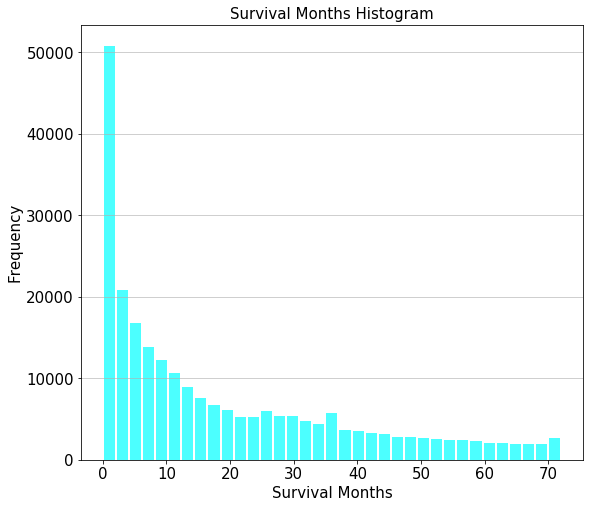

In [38]:
#Plotting the histogram for the freuency of survival months in the dataset
plt.figure(figsize=[9,8])
all_survive_months = df['Survival_months']
n, bins, patches = plt.hist(x=all_survive_months, bins=35, color='#00FFFF',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Survival Months',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Survival Months Histogram',fontsize=15)
plt.show()

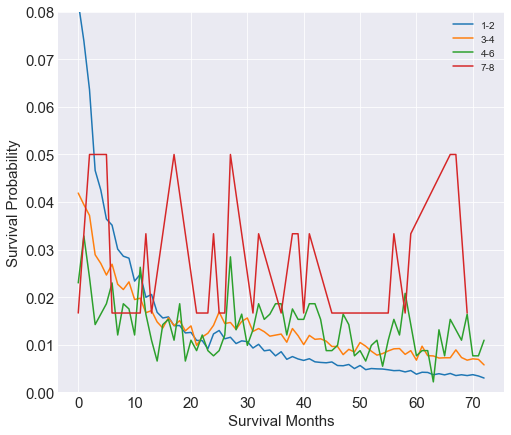

In [39]:
#Plotting the graph for survival probability for different ranges of count of malignant tumor
from collections import Counter
series_age = df['NumMaligantTumor']
list_age = series_age.tolist()
set_list_age = set(list_age)
list_age = list(set_list_age)
list_age.sort()
# print(list_age)
dict_prob = {}

dict_counters = {}
list_all_months = []
for t_size in list_age:
    df_select=df[df['NumMaligantTumor'] == t_size]
    list_surv_mnths = df_select['Survival_months'].tolist()
    list_surv_mnths.sort()
    list_all_months.append(list_surv_mnths)
    counter_list_surv_mnths = Counter(list_surv_mnths)
    dict_counters[t_size] = counter_list_surv_mnths

list_list_x_cord = []
list_list_y_cord = []
#Making bins for range of malignant tumor counts
for a in range(0, len(list_age), +2):
    end_limit = a + 1
#     print(f"{list_age[a]}   {list_age[end_limit]}")
    if end_limit > len(list_age)-1:
        end_limit = len(list_age) - 1
    
    set_mnths = set(list_all_months[a])
    list_keys = list_age[a:end_limit+1]
    for b in range(a, end_limit+1):
        set_temp = set(list_all_months[b])
        set_mnths.union(set_temp)
    
    list_set_mnths = list(set_mnths)
    list_set_mnths.sort()
    list_list_x_cord.append(list_set_mnths)
    len_list_surv_mnths = len(list_set_mnths)
    list_prob = []
    val_den = 0
    dict_val_num = {}
    for sm in list_set_mnths:
        val_prob_num = 0
        for c in list_keys:
            val_prob_num = val_prob_num + dict_counters[c][sm]
        val_den += val_prob_num
        dict_val_num[sm] = val_prob_num
    for smn in list_set_mnths:
        val_prob = dict_val_num[smn] / val_den
        list_prob.append(val_prob)
    
    list_list_y_cord.append(list_prob)
    

list_legend = ['1-2','3-4', '4-6','7-8','9-10', '10 and above']

# print(list_list_x_cord)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=[8,7])
plt.ylim(0.0, 0.08)
for a in range(len(list_list_x_cord)-2):
#     curr_label = 'Age=' + str(list_tumour_size[a])
#     plt.scatter(list_list_x_cord[a], list_list_y_cord[a], marker = '_',  label = list_legend[a])
    plt.plot(list_list_x_cord[a], list_list_y_cord[a], label = list_legend[a])
    plt.xlabel('Survival Months',fontsize=15)
    plt.ylabel('Survival Probability',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # plt.title('Survival Months Histogram',fontsize=15)

plt.legend()
plt.show()

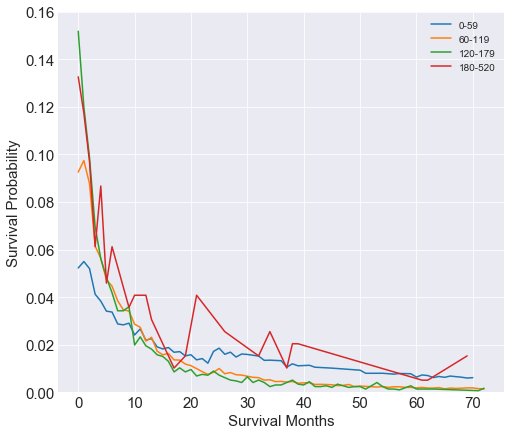

In [40]:
#Plotting graph for survival probability for different ranges of tumor
series_age = df['CSTumorSize']
list_age = series_age.tolist()
set_list_age = set(list_age)
list_age = list(set_list_age)
list_age.sort()
# print(list_age)
dict_prob = {}

dict_counters = {}
list_all_months = []
for t_size in list_age:
    df_select=df[df['CSTumorSize'] == t_size]
    list_surv_mnths = df_select['Survival_months'].tolist()
    list_surv_mnths.sort()
    list_all_months.append(list_surv_mnths)
    counter_list_surv_mnths = Counter(list_surv_mnths)
    dict_counters[t_size] = counter_list_surv_mnths

list_list_x_cord = []
list_list_y_cord = []
for a in range(0, len(list_age), +60):
    end_limit = a + 59
#     print(f"{list_age[a]}   {list_age[end_limit]}")
    if end_limit > len(list_age):
        end_limit = len(list_age) - 1
    
    set_mnths = set(list_all_months[a])
    list_keys = list_age[a:end_limit+1]
    for b in range(a, end_limit+1):
        set_temp = set(list_all_months[b])
        set_mnths.union(set_temp)
    
#     print(set_mnths)
    list_set_mnths = list(set_mnths)
    list_set_mnths.sort()
    list_list_x_cord.append(list_set_mnths)
    len_list_surv_mnths = len(list_set_mnths)
    list_prob = []
    val_den = 0
    dict_val_num = {}
    for sm in list_set_mnths:
        val_prob_num = 0
        for c in list_keys:
            val_prob_num = val_prob_num + dict_counters[c][sm]
        val_den += val_prob_num
        dict_val_num[sm] = val_prob_num
    for smn in list_set_mnths:
        val_prob = dict_val_num[smn] / val_den
        list_prob.append(val_prob)
    
    list_list_y_cord.append(list_prob)
    

list_legend = ['0-59','60-119', '120-179', '180-520', 'Above 520']

# print(list_list_x_cord)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=[8,7])
plt.ylim(0.0, 0.16)
for a in range(len(list_list_x_cord)-1):
#     curr_label = 'Age=' + str(list_tumour_size[a])
#     plt.scatter(list_list_x_cord[a], list_list_y_cord[a], marker = '_',  label = list_legend[a])
    plt.plot(list_list_x_cord[a], list_list_y_cord[a], label=list_legend[a])
    plt.xlabel('Survival Months',fontsize=15)
    plt.ylabel('Survival Probability',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # plt.title('Survival Months Histogram',fontsize=15)

plt.legend()
plt.show()

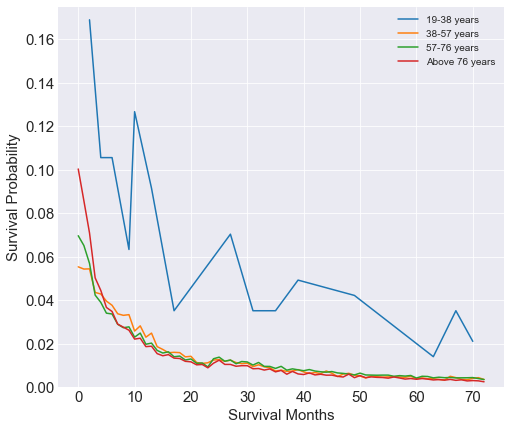

In [41]:
#Plotting the graph for survival probability for different ranges of Age
series_age = df['Age']
list_age = series_age.tolist()
set_list_age = set(list_age)
list_age = list(set_list_age)
# print(len(list_age))
list_age.sort()
dict_prob = {}

dict_counters = {}
list_all_months = []
for t_size in list_age:
    df_select=df[df['Age'] == t_size]
    list_surv_mnths = df_select['Survival_months'].tolist()
    list_surv_mnths.sort()
    list_all_months.append(list_surv_mnths)
    counter_list_surv_mnths = Counter(list_surv_mnths)
    dict_counters[t_size] = counter_list_surv_mnths

list_list_x_cord = []
list_list_y_cord = []
for a in range(0, len(list_age), +4):
    end_limit = a + 3
    if end_limit > len(list_age)-1:
        end_limit = len(list_age) - 1
    
    set_mnths = set(list_all_months[a])
    for b in range(a, end_limit + 1):
        set_temp = set(list_all_months[b])
        set_mnths.union(set_temp)
    
    list_set_mnths = list(set_mnths)
    list_set_mnths.sort()
    list_list_x_cord.append(list_set_mnths)
    len_list_surv_mnths = len(list_set_mnths)
    list_prob = []
    val_den = 0
    dict_val_num = {}
    for sm in list_set_mnths:
        val_prob_num = 0
        for c in range(a, end_limit + 1):
            val_prob_num = val_prob_num + dict_counters[c][sm]
        val_den += val_prob_num
        dict_val_num[sm] = val_prob_num
    for smn in list_set_mnths:
        val_prob = dict_val_num[smn] / val_den
        list_prob.append(val_prob)
    
    list_list_y_cord.append(list_prob)
    

list_legend = ['0-19 years','19-38 years', '38-57 years', '57-76 years', 'Above 76 years']

# print(list_list_x_cord)
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=[8,7])
plt.ylim(0.0, 0.175)
for a in range(1, len(list_list_x_cord)):
    plt.plot(list_list_x_cord[a], list_list_y_cord[a],  label = list_legend[a])
    plt.xlabel('Survival Months',fontsize=15)
    plt.ylabel('Survival Probability',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    # plt.title('Survival Months Histogram',fontsize=15)

plt.legend()
plt.show()